### 1.1 Por que usar *Quantum Machine Learning* ?

O **Aprendizado de Máquina Quântico** tem como objetivo explorar os princípios da mecânica quântica (superposição, emaranhamento, interferência...) para construir algoritmos mais poderosos que os algoritmos clássicos para ML, buscando resolver problemas incalculáveis ou com um tempo muito grande de resolução pelos computadores clássicos.

> A premissa é que visto um ganho em outras áreas quando comparado a quântica e o clássico, por qual motivo não existiria esse ganho no campo de *Machine Learning*.

Atualmente não existem provas concretas e universais de que algoritmos quânticos superem os algoritmos clássicos mais complexos, que utilizam o *Deep Learning* (dado a natureza empírica do campo de Aprendizado de Máquina).

No entanto já existem indícios teóricos que apontam uma superioridade, além de que se tratando puramente de dados quânticos é evidente que o treinamento direto de modelos quânticos se propõe mais performático que  a conversão para dados clássicos e processamento por algoritmos clássicos.

### Problemas não-lineares e Classificação complexa

Algoritmos clássicos lineares, logicamente possuem dificuldade na separação de dados que não podem ser divididos linearmente. Por outro lado, os algoritmos quânticos possuem uma abordagem direta que lidam  com essa não linearidade dos dados complexos.

A questão é que enquanto o ML clássico usa técnicas de *kernels* para mapear dados de baixas dimensões para um espaço de alta dimensão onde o mapeamento linear consegue atuar,  o ML quântico faz isso de forma natural através dos *Quantum Embedding* (a codificação dos dados clássicos para dados quânticos).

###  Circuitos Quânticos Parametrizados

O ML quântico utiliza desse tipo de circuito, também conhecido por **ansatz** como o coração do modelo variacional de aprendizado.

**Vantagem**: 

- Essa estrutura de circuito, permite a construção de algoritmos híbridos entre o clássico e o quântico (ideias para o nível dos dispositivos quânticos atuais), onde a parte quântica lida com a computação de altas dimensões e cálculos do gradiente, enquanto o clássico trabalha na otimização de parâmetros. 

### Espaço de Hilbert Exponencial

Considerado a maior promessa do ML quântico, esse é o espaço no qual os estados vetoriais de um sistema quântico reside, e esse espaço apresenta características que pode permitir a computação de problemas muito complexos para a computação clássica. Suas características incluem: 

- **Crescimento exponencial**: Para $n$ qubits, o espaço de Hilbert tem uma dimensão de $2^n$.

- **Capacidade de Representação**: Essa alta dimensionalidade pode ser utilizada para mapear dados em um espaço de features muito grande, além de representar modelos de forma mais complexa que modelos clássicos.

- **Aceleração**: O processamento dessas altas dimensões, em alguns casos pode ser tratável por técnicas clássicas, contudo espera-se que o ML quântico ofereça uma eficiência exponencial, em relação a classificação, clusterização... 

<!-- TODO: Argumentar sobre vantagens potenciais -->
<!-- - Problemas não-lineares -->
<!-- - Espaço de Hilbert exponencial -->

---

### 1.2 Dataset XOR: Problema Não-Linear

Dataset didático para ilustrar a necessidade de modelos não-lineares.

No plano 2D, os dados de entrada $(0, 0)$, $(0, 1)$, $(1, 0)$, e $(1, 1)$ com suas respectivas saídas não podem ser separados por uma única linha reta. 

O ML Quântico, através do mapeamento de dados no **Espaço de Hilbert**, pode transformar esse problema não-linear em um problema linearmente separável, demonstrando sua capacidade de lidar com a não-linearidade de forma eficiente.

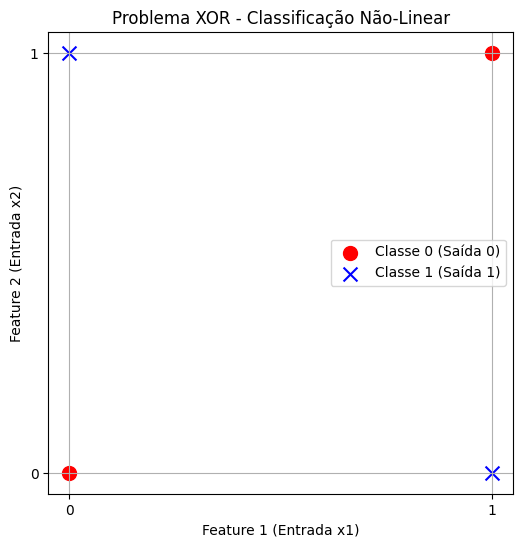

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# X: Matriz de features (entradas)
# y: Vetor de labels (saídas esperadas)
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

plt.figure(figsize=(6, 6))

# Classe 0: (0, 0) e (1, 1)
X_class_0 = X_xor[y_xor == 0]

# Classe 1: (0, 1) e (1, 0)
X_class_1 = X_xor[y_xor == 1]

plt.scatter(X_class_0[:, 0], X_class_0[:, 1], c='red', marker='o', s=100, label='Classe 0 (Saída 0)')
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], c='blue', marker='x', s=100, label='Classe 1 (Saída 1)')

plt.title('Problema XOR - Classificação Não-Linear')
plt.xlabel('Feature 1 (Entrada x1)')
plt.ylabel('Feature 2 (Entrada x2)')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)
plt.legend()
plt.show()

---

### 1.3 Embedding de Dados Clássicos

#### Conceito de Encoding 

Esse processo de codificação, no qual é transformado os dados clássicos em dados quânticos, se faz necessário, pois um computador quântico só consegue operar manipulando propriedades desses estados quânticos.

Essa codificação consiste na aplicação de um conjunto de portas quânticas que atuam sobre um estado inicial de qubits (geralmente inicializados como $|0\rangle^{\otimes n}$), para dessa forma mapear o vetor de características (*feature vector*) clássico $x$ para um  estado de vetor quântico $|\psi(x)\rangle$.

#### Funcionamento

De forma resumida, para obtermos o estado clássico como um estado quântico, temos:
$$
|\psi(x)\rangle = U_{encoding}(x)|0\rangle^{\otimes n}
$$
Onde, $U_{encoding}(x)$  representa o circuito quântico de codificação que depende dos dados clássicos.

A escolha consciente desse método de codificação, é muito importante, pois afeta:

1. A capacidade do circuito quântico de processar os dados (se o modelo quântico conseguirá aprender as relações nos dados).

2. A profundidade e o número de portas do circuito, o que é imprescindível no atual contexto da computação quântica onde os dispositivos ainda são muito ruidosos (isso tende a escalar quanto maior a quantidade de operações e pode tornar inutilizável a codificação).

#### Angle Embedding

Esse é um dos métodos mais utilizados e funcionais, especialmente para os dados de natureza vetorial, que são os dados utilizados para o aprendizado de máquina clássico.

**Objetivo** : 

- Logicamente a ideia principal é transpor um vetor de características clássico para um um estado quântico. Nesse método, isso é feito mapeando as *features* clássicas para um ângulo de rotação em um *qubit* correspondente.

**Como funciona?**

- São utilizadas portas de rotação unitárias ($R_x, R_y \ \text{ou} \ R_z$) em cada *qubit*, onde o ângulo dessa rotação é uma função relacionada ao valor da *feature* clássica ($x_i$).

$$\text{Exemplo de } R_Y\text{: } |\psi(\vec{x})\rangle = \left(\bigotimes_{i=1}^n R_Y(f(x_i))\right) |0\rangle^{\otimes n}$$
> Nesse exemplo,  é utilizado a porta $R_y(\theta)$ e $f(x_i)$ é a função que escala/transforma a *feature* clássica ($x_i$) no ângulo.

- **Vantagem**:  É eficiente em termos de qubit, a quantidade de qubits é proporcional a quantidade de *features* clássicas, dessa forma o circuito se torna raso (poucas camadas de portas) e como dito anteriormente isso é ideal para os atuais dispositivos quânticos:

$$
n \ qubits = n \ features \ \text{clássicas} 
$$

- **Limitação**: Com essa construção de apenas portas de rotação, só é feito a codificação das características diretamente no estado. Para que exista correlação entre esses estados que capturaram as *features* clássicas, é necessário adicionar portas de emaranhamento ($H$, $CNOT$...) após as portas de rotação. 

> O que logicamente aumenta a complexidade do circuito, e tende a diminuir sua vantagem de eficiência.

<!-- TODO: Explicar como transformamos dados clássicos em estados quânticos -->
<!-- - Conceito de encoding -->
<!-- - Angle embedding (breve menção) -->

---

### 1.4 O que são Modelos Variacionais

#### A definição direta de **Modelos Quânticos Variacionais** é:

> Circuitos quânticos parametrizados, projetados para serem otimizados por um computador clássico.

#### Quebrando essa definição por partes, vamos começar entendendo o que é um **circuito quântico parametrizado**:

> Ele consiste em uma sequência de portas quânticas cujas ações dependem de um conjunto de parâmetros ajustáveis ($\theta$), é chamado de *Ansatz* do *MQV*.

A função desse circuito é mapear um estado quântico de entrada para um estado quântico de saída, com a transformação exata determinada pelos parâmetros ajustáveis $\theta$.

Assim, dado um circuito o núcleo desse *MQV* será o operador unitário ($U(\theta)$) que atua sobre um estado quântico inicial ($|\psi_{in}$), baseado em um parâmetro, e produz um estado final $(U(\theta)|\psi_{in} = |\psi_{out})$ 

A estrutura desses circuitos é uma repetição de duas partes combinadas (que formam as **camadas**):

- Portas de Rotação (Parte Variacional)

    - Essas portas são resposáveis por aplicarem transformações controladas de acordo com parâmetros, que um otimizador clássico ajusta. (Essas portas atuam sobre qubits individuais)

    - **Exemplos**: $R_x(\theta), R_y(\theta), R_z(\theta)$

- Portas de Emaranhamento (Parte de Conectividade)

    - Essas são as portas resposáveis por criarem o emaranhamento. Isso permite que esse sistema quântico explore o **Espaço de Hilbert** de forma não clássica, e essas portas não possuem parâmetros ajustáveis. (Sem essa conectividade o circuito seria apenas variadas operações desordenadas em múltiplos qubits)

    - **Exemplos**: CNOT, CZ, CSWAP.

A partir disso, conseguimos definir a capacidade do modelo na complexidade da função mapeada, pela quantidade de vezes que essas camadas são repetidas.

#### O Algoritmo híbrido

Compreendido o coração do *MQV*, podemos entender sua composição completa:

1. **Embeddings de Dados** (Codificação): Nessa fase tem o mapeamento dos dados clássicos para um estado quântico inicial ($|\psi_{in}$)

2. **Ansatz** (Aplica o $U(\theta)$): Atuação do circuito parametrizado para movimentar o estado quântico de forma compleexa através do Espaço de Hilbert. Esse é o coração do aprendizado, no qual os parâetros funcionam como "alavancas" que o otimizador clássico utiliza para ir guiando o estado de saída.

3. **Medição** (*Expectation Value*): A fase na qual uma parte mensurável é medida do esado de saída, que resulta em um valor clássico (o valor de expectativa), sendo esse valor o resultado de aprendizado do modelo.

4. **Otimização Clássica**: Essa é a parte essencialmente híbrida do algoritmo, na qual o valor de expectativa é utilizado para calcular a *Loss Function*, através de otimizadores clássicos como o Adam, que ajusta os parâmetros $\theta$, em busca de minizar a função de custo.

#### Analogia ao Clássico

Temos que o circuito parametrizado seria um temnplate da arquiterura da Rede Neural (como as RNN, CNN...), com a definição dos números de camadas e das conexões, mas sem efetivamente ter os pesos e vieses treinados (inicializados com valores aleatórios).

A definição do erro do modelo quântico é dada pela medição do *Ansatz*, enquanto de forma analóga a função de custo do modelo clássico é baseada na saída da Rede Neural. Além disso, o ajuste de parâmetros embora realizado pelo mesmo otimizador, utiliza um *Quantum Gradient* no caso quântico, e não o *Backpropagation* do clássico. 

#### Implicação para o *Quantum Machine Learning* (QML)

> Esses modelos são imprescindíveis ao QML, por utilizarem essa conexão entre o clássico e o quântico.

Essa hibridização potencializa e facilita a utilização desse modelo, visto que a computação quântica atual tem muitas limitações (Ruídos), assim aproveitar do poder da computação clássica é um ótimo facilitador.

Além disso, esses modelos em teoria permitem uma exploração dde alta dimensão no Espaço de Hilbert e contam com o fenômewno de emaranhamento para conseguir aprender funções e padrões que não são possíveis ou muito ineficientes em redes neurais clássicas.

Por fim, esse modelo possui uma parte centrral extremamente adaptável, o *Ansatz* pode ser utilizado tanto para classificação, quanto para otimização, o que torna o *MQV* uma escolha muito segura e completa.


<!-- TODO: Explicar o conceito de modelos variacionais -->
<!-- - Circuitos quânticos parametrizados -->
<!-- - Analogia com redes neurais clássicas -->
<!-- - Por que são úteis para ML -->

---

### 1.5 Parâmetros Ajustáveis

Esses parâmetros representados pelo vetor $\theta$, são responsáveis por definirem as transformações (o resultado das portas quânticas) dentro do circuito ($U(\theta)$).  São os ângulos de rotação para essas portas quânticas parametrizadas.

Sendo assim, eles são cruciais por controlarem o comportamento  e a capacidade de representação dos modelos quânticos.
#### Como são atualizados durante o treinamento?

O processo para ajustar esses parâmetros é bem similar ao treinamento clássico, no qual existe um otimizador que busca minimizar uma função de custo (*loss function*).

1. **Cálculo da função de custo** ($C(\theta)$): O circuito quântico é executado utilizando o conjunto de parâmetros do vetor $\theta$, e o resultado da medição é utilizando para quantificar a precisão do modelo.

$$
C(\theta) = \langle \psi(\theta) | H | \psi(\theta) \rangle
$$

2. **Cálculo do Gradiente**: Para descobrir como ajustar os parâmetros  e reduzir o erro da função de custo, é preciso calcular o gradiente da função de custo em relação a cada parâmetro $\theta_i$.  (Esse gradiente permite localizar o ponto  mínimo da função de custo)

3. **Atualização dos Parâmetros**: Nessa última etapa o otimizador utilizados também nos algoritmos clássicos, é responsável por a partir do gradiente atualizar o valor dos parâmetros.

> Esses passos são repetidos múltiplas vezes, com o intuito de se aproximar cada vez mais do mínimo da função de custo.

#### Analogia aos pesos clássicos: 

A função dos pesos e vieses no ML clássico é controlar a intensidade e o sentido entre as conexões dos neurônios, enquanto os parâmetros quânticos controlam a quantidade de rotação (ângulo) do estado quântico.

> Ambos possuem o mesmo objetivo, de definir a transformação nos dados.

<!-- TODO: Explicar os parâmetros θ do circuito -->
<!-- - Como são atualizados durante o treinamento -->
<!-- - Analogia com pesos em ML clássico -->

---

### 1.6 Quantum Gradients: Parameter-Shift Rule

Os gradientes quânticos são as derivadas parciais do valor de expectância de uma função de custo quântica, como visto anteriormente, em relação aos seus parâmetros ajustáveis (vetor $\theta$).

Como também no ML clássico, o objetivo do ML quântico é minimizar a função de custo, através do ajuste dos parâmetros, logo o gradiente indica a direção para encontrar o valor mínimo dessa função.

#### Gradiente Quântico VS Gradiente Clássico

As principais diferenças estão na forma que é feito o cálculo desse gradiente,  embora o algoritmo clássico mais utilizado é o *backpropagation*, que tem uma eficiência comprovadamente boa, o hardware quântico não suporta a utilização dessa técnica, visto a necessidade de acessar os valores dos pesos a armazena-lós para utilizar em uma derivação inversa.

Sendo assim, o modelo quântico aplica métodos especiais como a *Parameter Shift-Rule*. Além disso, a derivada do modelo clássico é obtida através da manipulação de dados numéricos, enquanto na quântica isso é realizado de forma direta a física do sistema, obtendo uma combinação linear de valores esperados.

#### Parameter Shift-Rule (Regra do Deslocamento de Parâmetro)

Esse método é mais útil para lidar com o cálculo de gradientes quânticos, pois não precisa acessar estados internos do circuito, o que nos casos de hardwares quânticos não é possível.

-  A derivada é calculada executando a função de custo quântica várias vezes (para obter duas avaliações de expectância confiáveis), com o deslocamento dos parâmetros de entrada em um valor fixo (aumentando e diminuindo).

- O gradiente (que é o vetor de derivadas) é obtido por uma diferença finita e exata entre essas duas medições de Expectância (Custo).

####  Importância para o MQV: 

O gradiente quântico é crucial para o funcionamento e construção dos MQV:

- **Habilita a otimização**: Sem o gradiente, não é possível para o otimizador consiga determinar qual a direção que permite alcançar o mínimo da função de custo, o que é justamente a "aprendizagem"  do modelo.

- **Compatibilidade com Hardware Quântico**:  Além disso, esse método detalhado acima, permite um cálculo de gradiente (embora que de forma direta ineficiente para muitas *features*) que pode ser realizado de forma nativa nos hardware quânticos (respeitando as limitações da mecânica quântica), usando apenas operações unitárias e medições.

<!-- TODO: Introduzir a ideia de quantum gradients -->
<!-- - Diferença para gradients clássicos -->
<!-- - Parameter-shift rule (sem matemática pesada) -->
<!-- - Por que é importante para MQV -->

---

### 1.7 Transição para Make Moons

O intuito deste último tópico é apresentar uma demonstração mais realista da aplicação de QML para resolução de problemas de ML, ainda deixando evidente a questão de datasets não lineares.
#### Demonstração XOR:

O **XOR** (Ou Exclusivo) é um exemplo didático simples , focado em evidenciar algo que um classificador linear simples (como um perceptron único) não consegue resolver.

No entanto, ele possui apenas quatro pontos de dados e duas dimensões, o que o torna muito pequeno e abstrato para ser considerado um problema realista.

#### Demonstração *Make Moons* :

Esse dataset sintético é muito utilizado em ML, para simular dados que formam uma estrutura complexa de dados, onde eles são agrupados em dois conjuntos em forma de meia-lua entrelaçados.

Assim, é ainda mais nítido a falta de linearidade, mas por conter um número arbitrário de *features* permite que seja demonstrado o funcionamento do modelo em um conjunto de dados mais similar ao encontrado na vida real.

> Contendo elementos como uma fronteira de decisão complexa  e suave,  presença ruído (não o ruído quântico) e espalhamento de dados (variância).

#### Conexão com QML:

Através desse dataset mais complexo, é possível destacar a capacidade do QML na resolução de problemas de classificação complexos de forma eficiente.

> Permite formar uma **fronteira de separação** que seria difícil ou ineficiente de encontrar no espaço de dados clássico.

Pode-se visualmente contrastar a dificuldade de separação no espaço clássico de entrada (com a técnica dos kernels), com a separação simplificada no espaço de característica quântico.

Por fim, saindo de um dataset teórico (*XOR*) para um dataset com resultados práticos (*Make Moons*).

<!-- TODO: Fazer ponte para o dataset real -->
<!-- - XOR é didático, mas pequeno -->
<!-- - Make moons é mais realista -->
<!-- - Manter não-linearidade -->

---

## 📝 Checklist de Entrega

- [ ] Conceitos teóricos explicados claramente
- [ ] Visualização do dataset XOR
- [ ] Slides preparados (motivação + conceitos)
- [ ] Ponte para make_moons estabelecida
- [ ] Tempo de apresentação: ~3 minutos

Curso Pennylane: https://colab.research.google.com/drive/1uIuS5TPvNwcMjb1npvE5i9WWJYu5FqTn?usp=sharing